Natural Language Processing w/ Natural Language Toolkit (NLTK)
* NLP falls under A.I. - computers performing tasks that humans can do
* Sentiment Analysis

Use Twitter's [API](https://developer.twitter.com/en/docs) to get data

1. Tokenize
2. "Normalize" Data - Stemming and Lemmatization
    * words have different forms - run, ran, running
    * two forms of normalizing that comes down to a trade off between speed and accuracy
3. Remove Noise
4. Data Preparation Pipeline
5. Vectorization

In [1]:
from nltk.corpus import twitter_samples

In [51]:
pos=twitter_samples.strings('positive_tweets.json')
neg=twitter_samples.strings('negative_tweets.json')
test=twitter_samples.strings('tweets.20150430-223406.json')
len(pos), len(neg), len(test)

(5000, 5000, 20000)

### 1. Tokenize

In [8]:
tweet_tokens=twitter_samples.tokenized('positive_tweets.json')
len(tweet_tokens)

5000

### 2. Lemmatization

#### need to determine the context of each word - this is done by a tagging algorithm based on the relative position of a word in a sentence. 

In [14]:
from nltk.tag import pos_tag

pos_tag(tweet_tokens[0])

[('#FollowFriday', 'JJ'),
 ('@France_Inte', 'NNP'),
 ('@PKuchly57', 'NNP'),
 ('@Milipol_Paris', 'NNP'),
 ('for', 'IN'),
 ('being', 'VBG'),
 ('top', 'JJ'),
 ('engaged', 'VBN'),
 ('members', 'NNS'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('community', 'NN'),
 ('this', 'DT'),
 ('week', 'NN'),
 (':)', 'NN')]

In [39]:
from nltk.stem.wordnet import WordNetLemmatizer

tokens=tweet_tokens[0]
lem=WordNetLemmatizer()
lem_tokens=[]

for word, tag in pos_tag(tokens):
    # lemmatize require pos tags
    if tag[0:1]=='NN': 
        pos='n'
    elif tag[0:1]=='VB': 
        pos='v'
    else: 
        pos='a'
    lem_tokens.append(lem.lemmatize(word, pos))
print(lem_tokens)

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


### 3. Remove Noise

#### noise includes stop words, punctuation, url, and username

In [40]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import string

tokens=tweet_tokens[0]
lem=WordNetLemmatizer()
cleaned_tokens=[]
# stop_words=()
stop_word=stopwords.words('english')

for word, tag in pos_tag(tokens):
    # print(word)
    word=re.sub('http[s]?//.+', '', word)
    word=re.sub('@.+', '', word)
    # lemmatize require pos tags
    if tag[0:1]=='NN': 
        pos='n'
    elif tag[0:1]=='VB': 
        pos='v'
    else: 
        pos='a'
    word=lem.lemmatize(word, pos)
    if len(word)>0 and word not in string.punctuation and word.lower() not in stop_words: 
        cleaned_tokens.append(word.lower())
print(cleaned_tokens)

#FollowFriday
@France_Inte
@PKuchly57
@Milipol_Paris
for
being
top
engaged
members
in
my
community
this
week
:)
['#followfriday', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


### Create Function as Preprocessing Pipeline

In [41]:
def preprocessing(tokens, stop_words=()):    
    # tokens=tweet_tokens[0]
    lem=WordNetLemmatizer()
    cleaned_tokens=[]
    # stop_words=()
    # stop_word=stopwords.words('english')
    for word, tag in pos_tag(tokens):
        word=re.sub('http[s]?//.+', '', word)
        word=re.sub('@.+', '', word)
        # lemmatize require pos tags
        if tag[0:1]=='NN': 
            pos='n'
        elif tag[0:1]=='VB': 
            pos='v'
        else: 
            pos='a'
        word=lem.lemmatize(word, pos)
        if len(word)>0 and word not in string.punctuation and word.lower() not in stop_words: 
            cleaned_tokens.append(word.lower())
    return cleaned_tokens

### Preprocess Data

In [52]:
pos=twitter_samples.tokenized('positive_tweets.json')
neg=twitter_samples.tokenized('negative_tweets.json')
test=twitter_samples.tokenized('tweets.20150430-223406.json')
pos_tokens=[]
neg_tokens=[]
stop_word=stopwords.words('english')
for tokens in pos: 
    pos_tokens.append(preprocessing(tokens, stop_word))
for tokens in neg: 
    neg_tokens.append(preprocessing(tokens, stop_word))

### Word Frequency

<BarContainer object of 10 artists>

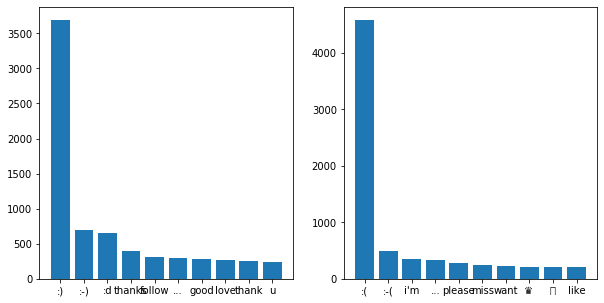

In [77]:
from nltk import FreqDist
import matplotlib.pyplot as plt

fig, ax=plt.subplots(1, 2, figsize=(10, 5))
pos_words=[]
for tokens in pos_tokens: 
    for token in tokens: 
        pos_words.append(token)
freq_dist_pos=FreqDist(pos_words).most_common(10)
ax[0].bar([word[0] for word in freq_dist_pos], [word[1] for word in freq_dist_pos])

neg_words=[]
for tokens in neg_tokens: 
    for token in tokens: 
        neg_words.append(token)
freq_dist_neg=FreqDist(neg_words).most_common(10)
ax[1].bar([word[0] for word in freq_dist_neg], [word[1] for word in freq_dist_neg])

In [79]:
pos_words

['#followfriday',
 'top',
 'engaged',
 'members',
 'community',
 'week',
 ':)',
 'hey',
 'james',
 'odd',
 ':/',
 'please',
 'call',
 'contact',
 'centre',
 '02392441234',
 'able',
 'assist',
 ':)',
 'many',
 'thanks',
 'listen',
 'last',
 'night',
 ':)',
 'bleed',
 'amazing',
 'track',
 'scotland',
 'congrats',
 ':)',
 'yeaaaah',
 'yippppy',
 'accnt',
 'verified',
 'rqst',
 'succeed',
 'got',
 'blue',
 'tick',
 'mark',
 'fb',
 'profile',
 ':)',
 '15',
 'days',
 'one',
 'irresistible',
 ':)',
 '#flipkartfashionfriday',
 'http://t.co/ebz0l2venm',
 'like',
 'keep',
 'lovely',
 'customers',
 'waiting',
 'long',
 'hope',
 'enjoy',
 'happy',
 'friday',
 'lwwf',
 ':)',
 'https://t.co/smyyriipxi',
 'second',
 'thought',
 '’',
 'enough',
 'time',
 'dd',
 ':)',
 'new',
 'shorts',
 'entering',
 'system',
 'sheep',
 'must',
 'buying',
 'jgh',
 'go',
 'bayan',
 ':d',
 'bye',
 'act',
 'mischievousness',
 'calling',
 'etl',
 'layer',
 'in-house',
 'warehousing',
 'app',
 'katamari',
 'well',
 '…',
 

### Sentiment Analysis
* Supervised Learning process, which requires each tweet to be labeled with a "sentiment" for training

#### First Try Naive Bayes Classifier
* Per [documentation](https://www.nltk.org/_modules/nltk/classify/naivebayes.html), the Naive Bayes Model from NLTK takes in a dictionary with words and keys and True as values
* Split the dataset into training and test for validation purposes
* Train model using NaiveBayesClassifier
* Measure performce using classify

In [108]:
import random
from nltk import classify
from nltk import NaiveBayesClassifier

split_ratio=.75

pos_data=[(dict([token, True] for token in tokens), 'Positive') for tokens in pos_tokens]
neg_data=[(dict([token, True] for token in tokens), 'Negative') for tokens in neg_tokens]

dataset=pos_data+neg_data
random.shuffle(dataset)

train_dataset=dataset[:int(len(dataset)*split_ratio)]
test_dataset=dataset[int(len(dataset)*split_ratio):]

classifier=NaiveBayesClassifier.train(train_dataset)
print(f'Accuracy is {classify.accuracy(classifier, test_dataset)}')
print(f'Most Informative Features are {classifier.show_most_informative_features(10)}')

Accuracy is 0.9956
Most Informative Features
                      :( = True           Negati : Positi =   2193.6 : 1.0
                      :) = True           Positi : Negati =   1801.7 : 1.0
                     x15 = True           Negati : Positi =     20.1 : 1.0
                     sad = True           Negati : Positi =     19.4 : 1.0
                     bam = True           Positi : Negati =     18.5 : 1.0
               community = True           Positi : Negati =     16.5 : 1.0
                 arrived = True           Positi : Negati =     14.3 : 1.0
                congrats = True           Positi : Negati =     13.1 : 1.0
                    sick = True           Negati : Positi =     12.5 : 1.0
              bestfriend = True           Positi : Negati =     12.3 : 1.0
Most Informative Features are None


In [144]:
pos_data

[({'#followfriday': True,
   'top': True,
   'engaged': True,
   'members': True,
   'community': True,
   'week': True,
   ':)': True},
  'Positive'),
 ({'hey': True,
   'james': True,
   'odd': True,
   ':/': True,
   'please': True,
   'call': True,
   'contact': True,
   'centre': True,
   '02392441234': True,
   'able': True,
   'assist': True,
   ':)': True,
   'many': True,
   'thanks': True},
  'Positive'),
 ({'listen': True,
   'last': True,
   'night': True,
   ':)': True,
   'bleed': True,
   'amazing': True,
   'track': True,
   'scotland': True},
  'Positive'),
 ({'congrats': True, ':)': True}, 'Positive'),
 ({'yeaaaah': True,
   'yippppy': True,
   'accnt': True,
   'verified': True,
   'rqst': True,
   'succeed': True,
   'got': True,
   'blue': True,
   'tick': True,
   'mark': True,
   'fb': True,
   'profile': True,
   ':)': True,
   '15': True,
   'days': True},
  'Positive'),
 ({'one': True,
   'irresistible': True,
   ':)': True,
   '#flipkartfashionfriday': True,


In [159]:
from nltk.tokenize import word_tokenize
input_tweet='I ordered just once from TerribleCo, they screwed up, never used the app again.'
print(f'{input_tweet}, {classifier.classify(dict([token, 1] for token in preprocessing(word_tokenize(input_tweet), stopwords.words("english"))))}')

I ordered just once from TerribleCo, they screwed up, never used the app again., Negative
